In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

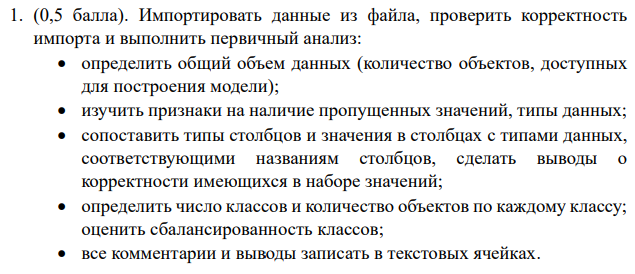

In [4]:
data = pd.read_csv('dataset.csv')
data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,Удовлетворен
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,Удовлетворен
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,Удовлетворен
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,Не удовлетворен
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,Не удовлетворен


In [7]:
rows, cols = data.shape 
print(f'Количество cтрок: {rows}')
print(f'Количество колонок: {cols}')

Количество cтрок: 1000
Количество колонок: 10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ID клиента                                                 1000 non-null   int64  
 1   Возраст                                                    897 non-null    float64
 2   Цель поездки                                               985 non-null    object 
 3   Класс обслуживания                                         1000 non-null   object 
 4   Уровень удовлетворенности онлайн-регистрацией на рейс      1000 non-null   int64  
 5   Уровень удовлетворенности обслуживанием в полете           1000 non-null   int64  
 6   Задержка отправления (мин)                                 1000 non-null   int64  
 7   Задержка прибытия (мин)                                    1000 non-null   float64
 8   Уровень удовле

In [11]:
data.isnull().sum()

ID клиента                                                     0
Возраст                                                      103
Цель поездки                                                  15
Класс обслуживания                                             0
Уровень удовлетворенности онлайн-регистрацией на рейс          0
Уровень удовлетворенности обслуживанием в полете               0
Задержка отправления (мин)                                     0
Задержка прибытия (мин)                                        0
Уровень удовлетворенности временем отправления и прибытия      0
Уровень удовлетворенности клиента                              0
dtype: int64

ID клиента - int64 - правильно  
Возраст - float64 - правильно
Цель поездки - object(str) -  правильно
Класс обслуживания - object - правильно
Уровень удовлетворенности онлайн-регистрацией на рейс -   int64 - правильно  
Уровень удовлетворенности обслуживанием в полете - int64 - правильно  
Задержка отправления (мин) - int64 - **ВОЗМОЖНО неправильно, т.к. ВСЕ клиенты не могут задержаться на ровно целое число секунд или это слишком маловероятно**  
Задержка прибытия (мин) - float64 - **ВОЗМОЖНО также не правильно так как все значения могут быть целыми**
Уровень удовлетворенности временем отправления и прибытия - int64  - верно
Уровень удовлетворенности клиента - object - верно 

Пропуски есть в столбце "Возраст"(10.3%) и "Цель поездки"(0.15%). Эти пропуски в дальнейшем нужно обработать: Для возраста можно испольовать среднее знч.\медиану, для цели поездки - модой, или удалением строк, т.к. их очень мало 

In [15]:
check_cols = ["Цель поездки", "Класс обслуживания", "Уровень удовлетворенности клиента"]
for col in check_cols:
    print(f'Уникальные значение для "{col}"', data[col].unique())
    
print('Всё ли дробь в "Задержка прибытия":', (data['Задержка прибытия (мин)'] % 1 != 0).sum())
print('Всё ли дробь в "Возраст":', (data['Возраст'] % 1 != 0).sum())
    

Уникальные значение для "Цель поездки" ['Частная' 'Деловая' nan]
Уникальные значение для "Класс обслуживания" ['Эконом' 'Бизнес' 'Комфорт']
Уникальные значение для "Уровень удовлетворенности клиента" ['Удовлетворен' 'Не удовлетворен']
Всё ли дробь в "Задержка прибытия": 0
Всё ли дробь в "Возраст": 103


Вывод:

- Уникальные значение для "Цель поездки" ['Частная' 'Деловая' nan] -> Значения логичны, но пропуски нужно обработать
- Уникальные значение для "Класс обслуживания" ['Эконом' 'Бизнес' 'Комфорт'] -> Всё корректно
- Уникальные значение для "Уровень удовлетворенности клиента" ['Удовлетворен' 'Не удовлетворен'] -> Всё корректно
- Всё ли дробь в "Задержка прибытия": 0 -- сл-но аномалия, так как заявлена дробное значение а все ячейки целые числа
- Всё ли дробь в "Возраст": 103 -- сл-но все нормально, возраст удовлетворяет условию типа данных колонки

In [21]:
print(10 % 1 == 0, 10 % 1)
print(10.5 % 1 == 0, 10.5 % 1)
print(10.5 / 1 == 0, 10.5 / 1)
print(10.5 // 1 == 0, 10.5 // 1)

True 0
False 0.5
False 10.5
False 10.0


## 5. Определение числа классов и их распределение

In [26]:
classes_cols = ["Цель поездки", "Класс обслуживания", "Уровень удовлетворенности клиента"]
for col in classes_cols:
    class_counts = data[col].value_counts()
    display(class_counts)

    # сбалансированность
    class_prop =  class_counts / class_counts.sum()
    print('Доля кадого класса:')
    display(class_prop)

Цель поездки
Деловая    717
Частная    268
Name: count, dtype: int64

Доля кадого класса:


Цель поездки
Деловая    0.727919
Частная    0.272081
Name: count, dtype: float64

Класс обслуживания
Бизнес     519
Эконом     414
Комфорт     67
Name: count, dtype: int64

Доля кадого класса:


Класс обслуживания
Бизнес     0.519
Эконом     0.414
Комфорт    0.067
Name: count, dtype: float64

Уровень удовлетворенности клиента
Удовлетворен       500
Не удовлетворен    500
Name: count, dtype: int64

Доля кадого класса:


Уровень удовлетворенности клиента
Удовлетворен       0.5
Не удовлетворен    0.5
Name: count, dtype: float64

## 3 пункт - сопоставление типов и значений

**Что делаю**: Проверяю уникальные значения категориальных столбцов, чтобы убедиться, что они соответствуют ожиданиям. Также проверяю, есть ли дробные значения в столбцах Возраст и Задержка прибытия, чтобы оценить корректность их типов данных.

Цель поездки  ~73%-деловая ~27%-частная. Классы не сбалансированны, что не подойдет для моделирования. Большое отклонение, сл-но требуется методы балансировки

Класс обслуживания - 52%-бизнес 41%-Эконом 7%-комфорт - классы не сбалансирован, возможно потребуется балансировка

Уровень удовлетворенности клиента - 50%-удовлетворен, 50%-не удовлетворен - класс полностью сбалансирован